In [59]:
## You can use this Code to check the analysis of Stocck Just you need to put the stock name from yahoo fiance in list of stock
## same as mentioned in list_of_stock=["IBULHSGFIN.NS","LICHSGFIN.NS","BAJFINANCE.NS"]##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import math
import os
import yfinance as yf
from datetime import date

In [105]:
## You just need to chanmge the stock name which you want to analyse##

list_of_stock=["IBULHSGFIN.NS","LICHSGFIN.NS","BAJFINANCE.NS"]

In [106]:
## Downloading The Data from Yahoo finance ##
## Librarey Used Yfinace ##
df=pd.DataFrame()  ## It have been intialise because if you run the code again it wwill generate the Empty DataFrame
## the below code can be created by defining the function and passing the dates and list of stock ##
for item in list_of_stock:
    
    start_date="2017-01-01"
    end_date="2022-07-03"
    
    df[item]=pd.DataFrame(yf.download(item,start=start_date,end=end_date,index=0,parse_dates=True)["Adj Close"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [107]:
df.head()

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
Date,,,
2017-01-02,545.694153,479.882751,858.305359
2017-01-03,532.507019,480.969116,872.067017
2017-01-04,517.631409,467.978546,860.130432
2017-01-05,525.591858,473.545929,887.604431
2017-01-06,528.647339,474.903870,866.591919


In [108]:
df_returns=df.pct_change()

In [109]:
df_returns.head()

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.024166,0.002264,0.016034
2017-01-04,-0.027935,-0.027009,-0.013688
2017-01-05,0.015379,0.011897,0.031942
2017-01-06,0.005813,0.002868,-0.023673


In [110]:
df_normalization_chart=(df/df.iloc[0])*100

In [111]:
df_normalization_chart

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
Date,,,
2017-01-02,100.000000,100.000000,100.000000
2017-01-03,97.583420,100.226381,101.603352
2017-01-04,94.857423,97.519351,100.212637
2017-01-05,96.316197,98.679506,103.413595
2017-01-06,96.876123,98.962480,100.965456
...,...,...,...
2022-06-27,19.131596,68.766798,654.864183
2022-06-28,18.737602,68.693862,647.324401
2022-06-29,17.912965,67.766556,639.958699


<AxesSubplot:xlabel='Date'>

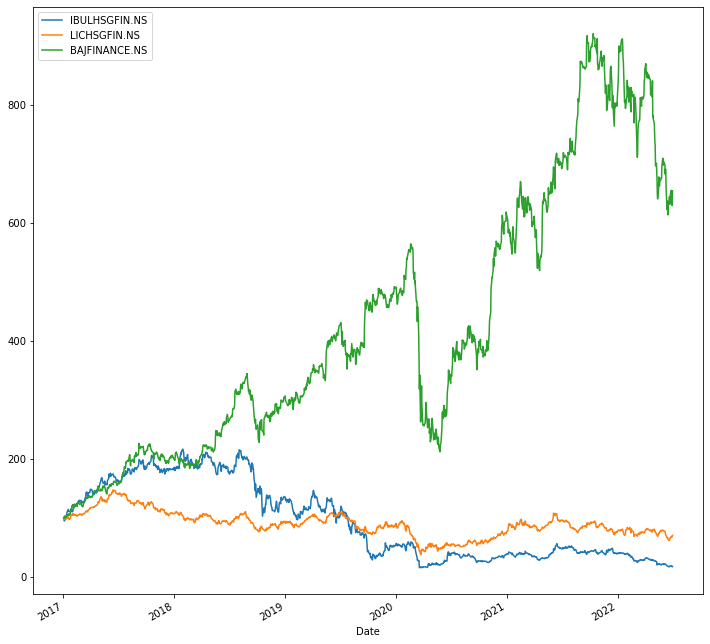

In [112]:
df_normalization_chart.plot(figsize=(12,12))

In [113]:
df.describe() ## it will provide basic stat of Stock like STD deviation in below Bajaj finance have highest STandard devaition

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
count,1360.000000,1360.000000,1360.000000
mean,514.321178,431.411738,3627.046829
std,351.795623,101.424740,1942.812535
min,86.170341,183.544296,858.305359
25%,205.952549,375.309891,1929.187531
50%,314.840164,429.979065,3222.418579
75%,863.749268,493.310402,5159.906616
max,1182.019653,707.195740,7900.533203


In [114]:
df_normalization_chart.describe() ## describe on normalize the data

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
count,1360.000000,1360.000000,1360.000000
mean,94.250813,89.899405,422.582335
std,64.467545,21.135317,226.354469
min,15.790959,38.247738,100.000000
25%,37.741388,78.208664,224.767038
50%,57.695352,89.600858,375.439643
75%,158.284501,102.798111,601.173762
max,216.608451,147.368443,920.480470


In [115]:
df_returns

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.024166,0.002264,0.016034
2017-01-04,-0.027935,-0.027009,-0.013688
2017-01-05,0.015379,0.011897,0.031942
2017-01-06,0.005813,0.002868,-0.023673
...,...,...,...
2022-06-27,0.034175,0.028999,0.009566
2022-06-28,-0.020594,-0.001061,-0.011514
2022-06-29,-0.044010,-0.013499,-0.011379


In [116]:
avg_return=df_returns.mean() ## these retunr is buy and hold for 5 years

In [117]:
avg_return*252*100

IBULHSGFIN.NS   -10.024419
LICHSGFIN.NS      1.067579
BAJFINANCE.NS    42.997597
dtype: float64

In [118]:
df_returns.corr() ## The correlation between the stocks

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
IBULHSGFIN.NS,1.000000,0.436223,0.367496
LICHSGFIN.NS,0.436223,1.000000,0.540054
BAJFINANCE.NS,0.367496,0.540054,1.000000


In [119]:
df_returns.cov() ## The covarience between the stock

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
IBULHSGFIN.NS,0.001724,0.000443,0.000386
LICHSGFIN.NS,0.000443,0.000598,0.000334
BAJFINANCE.NS,0.000386,0.000334,0.000640


In [120]:
weight=np.array([.125,.125,.75])

In [121]:
annual_return=avg_return*252

In [122]:
annual_return

IBULHSGFIN.NS   -0.100244
LICHSGFIN.NS     0.010676
BAJFINANCE.NS    0.429976
dtype: float64

In [123]:
portfilio_return=np.dot(weight,annual_return)

In [124]:
portfilio_return

0.31128592652893333

In [125]:
df.dtypes

IBULHSGFIN.NS    float64
LICHSGFIN.NS     float64
BAJFINANCE.NS    float64
dtype: object

In [126]:
df.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=1360, freq=None)

In [127]:
df.iloc[0]

IBULHSGFIN.NS    545.694153
LICHSGFIN.NS     479.882751
BAJFINANCE.NS    858.305359
Name: 2017-01-02 00:00:00, dtype: float64

In [128]:
df

,IBULHSGFIN.NS,LICHSGFIN.NS,BAJFINANCE.NS
Date,,,
2017-01-02,545.694153,479.882751,858.305359
2017-01-03,532.507019,480.969116,872.067017
2017-01-04,517.631409,467.978546,860.130432
2017-01-05,525.591858,473.545929,887.604431
2017-01-06,528.647339,474.903870,866.591919
...,...,...,...
2022-06-27,104.400002,330.000000,5620.734375
2022-06-28,102.250000,329.649994,5556.020020
2022-06-29,97.750000,325.200012,5492.799805


In [132]:
df["IBULHSGFIN.NS"].min()

86.17034149169922

In [133]:
df["IBULHSGFIN.NS"].argmin() ## Provide the index Number ##

791

In [136]:
df["IBULHSGFIN.NS"].iloc[791] ### Prove the vlaue at locatuion

86.17034149169922

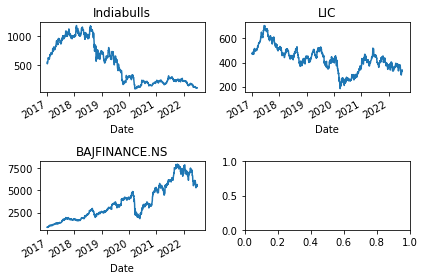

In [151]:
fig,ax=plt.subplots(2,2)
df["IBULHSGFIN.NS"].plot(ax=ax[0,0],title="Indiabulls")
df["LICHSGFIN.NS"].plot(ax=ax[0,1],title="LIC")
df["BAJFINANCE.NS"].plot(ax=ax[1,0],title="BAJFINANCE.NS")
plt.tight_layout()


In [150]:
import pandas_datareader as pdr

In [153]:
from statsmodels.tsa.stattools import adfuller

In [154]:
result=adfuller(df["BAJFINANCE.NS"])

In [155]:
result 
## if ist number which is T value if that is negative as negative as good data is stationary
## if p value smaller than 0.05 the we can reject null hypothesis reject non stationary

(-1.2737739999115445,
 0.6410837194994546,
 7,
 1352,
 {'1%': -3.4351959756924972,
  '5%': -2.8636801283740203,
  '10%': -2.5679094065552674},
 15938.337899204187)